In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/python.jup/wine/wine_catalogue.csv')

In [2]:
# удалим столбец 'Unnamed: 0'

df = df.drop('Unnamed: 0', axis = 1)

In [3]:
df

,title,type,kind,country,region,price_eur,volume_lit,order_number
0,Fragolino Rosso Frizzante - Bottega,wine-based beverage,fragolino,mild - doux - sweet - dolce,Italy,5.97,0.75,70601-IT-RW-001
1,Grauer Burgunder eins zu eins Kabinett trocke...,white wine,dry,Germany,Palatinate,7.49,0.75,70126-DE-WW-PG-002-12
2,Fabelhaft Tinto Douro DOC Rotwein 2020 - Niep...,red wine,dry,Portugal,Douro & Porto (PT),10.48,0.75,70009-PT-RW-BL-009-12
3,Motivo Rosé extra dry - Borgo Molino,sparkling wine,spumante,extra dry,Italy,10.86,0.75,70121-IT-SW-BL-001
4,Mandus Primitivo di Manduria DOC 2019 - Pietr...,red wine,dry,Italy,Apulia (IT),10.76,0.75,70015-IT-RW-PR-005-11
...,...,...,...,...,...,...,...,...
11291,Santa Digna Rosé Cabernet Sauvignon 2021 - Mi...,rosé wine,dry,Chile,Valle Central (CL),7.49,0.75,70011-CL-RO-CS-215-13
11292,Grauburgunder trocken 2021 - Ellermann-Spiegel,white wine,dry,Germany,Palatinate,6.89,0.75,70569-DE-WW-GB-010-15
11293,Fragolino Rosso - Terre del Sole,wine-based beverage,fragolino,mild - doux - sweet - dolce,Italy,4.64,0.75,70077-IT-SW-001
11294,Sessantanni Primitivo di Manduria DOC 2017 - ...,red wine,semi-dry,Italy,Apulia (IT),19.90,0.75,70342-IT-RW-PR-503-11


In [4]:
df.describe()

,price_eur,volume_lit
count,11296.000000,11296.00
mean,8.300625,0.75
std,3.782747,0.00
min,4.640000,0.75
25%,6.135000,0.75
50%,6.940000,0.75
75%,10.550000,0.75
max,19.900000,0.75


In [5]:
df.type.unique()

array(['wine-based beverage', 'white wine', 'red wine', 'sparkling wine',
       'rosé wine'], dtype=object)

In [6]:
df.groupby(['country', 'title', 'region'], as_index = False) \
            .agg({'type' : 'count'}) \
            .rename(columns = {'type' : 'w_number'})

,country,title,region,w_number
0,Chile,Santa Digna Rosé Cabernet Sauvignon 2021 - Mi...,Valle Central (CL),706
1,France,Fleur de d'Artagnan Blanc Côtes de Gascogne 2...,Gascogne (FR),706
2,France,Horgelus Blanc Côtes de Gascogne 2021 - Domai...,Gascogne (FR),706
3,Germany,Grauburgunder trocken 2021 - Ellermann-Spiegel,Palatinate,706
4,Germany,Grauer Burgunder eins zu eins Kabinett trocke...,Palatinate,706
5,Germany,Sauvignon Blanc trocken 2021 - Ellermann-Spie...,Palatinate,706
6,Germany,Schmetterlinge im Bauch Rosé 2020 - Weingut K...,Baden (DE),706
7,Italy,Corvo Rosso Terre Siciliane 2019 - Duca di Sa...,Sizilien (IT),706
8,Italy,Mandus Primitivo di Manduria DOC 2019 - Pietr...,Apulia (IT),706
9,Italy,Sessantanni Primitivo di Manduria DOC 2017 - ...,Apulia (IT),706


In [7]:
# как мы видим выше, в столбце "country" нелогично указаны некоторые значения (extra dry, extra dry, mild - doux - sweet - dolce). Их нужно заменить на значения из столбца "region".

df = df.replace({'country' : {'brut - bruto' : 'France', 'extra dry' : 'Italy', 'mild - doux - sweet - dolce' : 'Italy'}})

In [8]:
df.groupby(['country', 'title', 'region'], as_index = False) \
            .agg({'type' : 'count'}) \
            .rename(columns = {'type' : 'w_number'})

,country,title,region,w_number
0,Chile,Santa Digna Rosé Cabernet Sauvignon 2021 - Mi...,Valle Central (CL),706
1,France,Aimery Grande Cuvée 1531 Rosé Crémant Brut - ...,France,706
2,France,Fleur de d'Artagnan Blanc Côtes de Gascogne 2...,Gascogne (FR),706
3,France,Horgelus Blanc Côtes de Gascogne 2021 - Domai...,Gascogne (FR),706
4,Germany,Grauburgunder trocken 2021 - Ellermann-Spiegel,Palatinate,706
5,Germany,Grauer Burgunder eins zu eins Kabinett trocke...,Palatinate,706
6,Germany,Sauvignon Blanc trocken 2021 - Ellermann-Spie...,Palatinate,706
7,Germany,Schmetterlinge im Bauch Rosé 2020 - Weingut K...,Baden (DE),706
8,Italy,Corvo Rosso Terre Siciliane 2019 - Duca di Sa...,Sizilien (IT),706
9,Italy,Fragolino Rosso - Terre del Sole,Italy,706


In [9]:
# Группировка по странам. Наибольшее предложение вид представлено Италией.

df_number = df.groupby('country', as_index = False) \
            .agg({'title' : 'count'}) \
            .sort_values('title', ascending = False) \
            .rename(columns = {'title' : 'w_number'}) 

In [10]:
df_number

,country,w_number
3,Italy,4236
2,Germany,2824
1,France,2118
0,Chile,706
4,Portugal,706
5,Spain,706


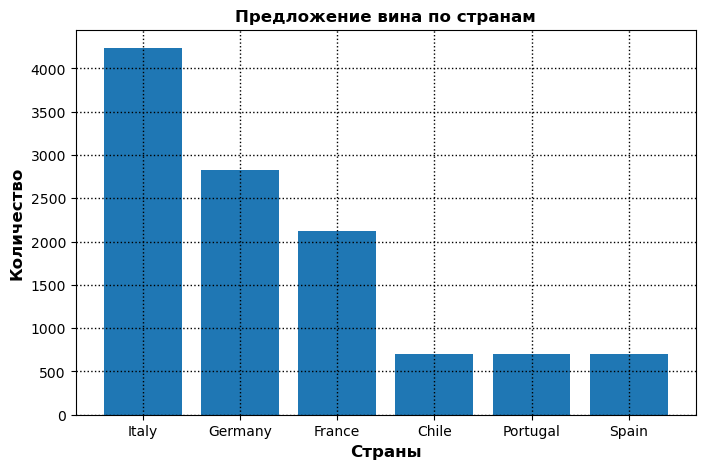

In [11]:
plt.figure(figsize=(8,5))
x = df_number.country
y = df_number.w_number
plt.bar(x,y)
plt.title('Предложение вина по странам', fontweight="bold", fontsize=12)
plt.xlabel('Страны', fontweight="bold", fontsize=12)
plt.ylabel('Количество', fontweight="bold", fontsize=12)
plt.grid(color='black', linestyle=':', linewidth=1)

In [12]:
# Представлены названия вин, страны проихождения, стоимоть, отсортированная по убыванию.

df_price = df.groupby(['country' ,'title'], as_index = False) \
            .agg({'price_eur' : 'max'}) \
            .sort_values('price_eur', ascending = False)

In [13]:
df_price

,country,title,price_eur
13,Italy,Sessantanni Primitivo di Manduria DOC 2017 - ...,19.90
1,France,Aimery Grande Cuvée 1531 Rosé Crémant Brut - ...,12.50
12,Italy,Motivo Rosé extra dry - Borgo Molino,10.86
11,Italy,Mandus Primitivo di Manduria DOC 2019 - Pietr...,10.76
14,Portugal,Fabelhaft Tinto Douro DOC Rotwein 2020 - Niep...,10.48
0,Chile,Santa Digna Rosé Cabernet Sauvignon 2021 - Mi...,7.49
5,Germany,Grauer Burgunder eins zu eins Kabinett trocke...,7.49
6,Germany,Sauvignon Blanc trocken 2021 - Ellermann-Spie...,6.99
4,Germany,Grauburgunder trocken 2021 - Ellermann-Spiegel,6.89
8,Italy,Corvo Rosso Terre Siciliane 2019 - Duca di Sa...,6.59


In [15]:
# Показан объем предложения по виду вина. 

w_kind = df.groupby('kind', as_index = False) \
            .agg({'title' : 'count'}) \
            .rename(columns = {'title' : 'w_number'}) \
            .sort_values('w_number', ascending = False) \
           

In [17]:
w_kind

,kind,w_number
1,dry,7060
2,fragolino,1412
3,semi-dry,1412
0,crémant,706
4,spumante,706


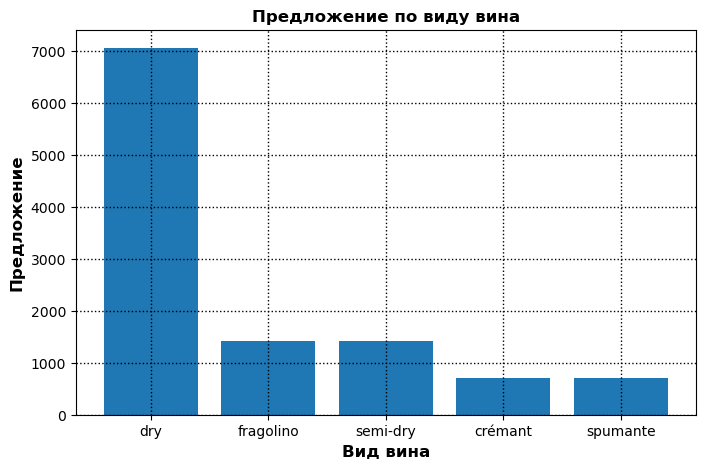

In [20]:
plt.figure(figsize=(8,5))
x = w_kind.kind
y = w_kind.w_number
plt.bar(x,y)
plt.title('Предложение по виду вина', fontweight="bold", fontsize=12)
plt.xlabel('Вид вина', fontweight="bold", fontsize=12)
plt.ylabel('Предложение', fontweight="bold", fontsize=12)
plt.grid(color='black', linestyle=':', linewidth=1)

In [24]:
# Показан объем предложения по типу вина. 

w_type = df.groupby('type', as_index = False) \
            .agg({'title' : 'count'}) \
            .rename(columns = {'title' : 'w_number'}) \
            .sort_values('w_number', ascending = False)
          

In [25]:
w_type

,type,w_number
0,red wine,3530
3,white wine,3530
1,rosé wine,1412
2,sparkling wine,1412
4,wine-based beverage,1412


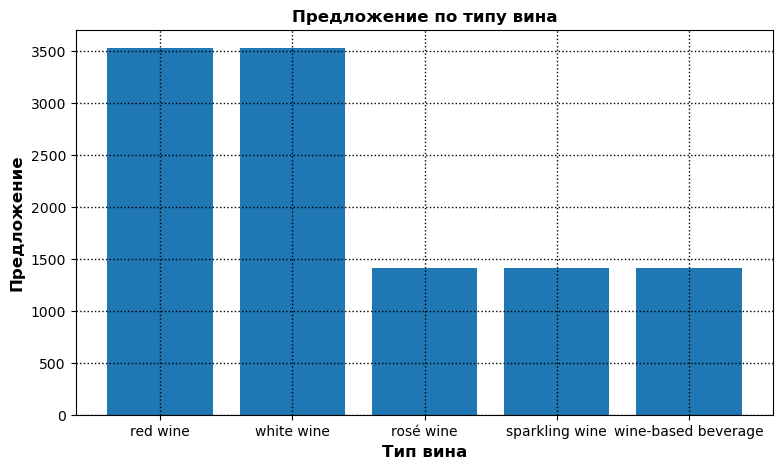

In [29]:
plt.figure(figsize=(9,5))
x = w_type.type
y = w_type.w_number
plt.bar(x,y)
plt.title('Предложение по типу вина', fontweight="bold", fontsize=12)
plt.xlabel('Тип вина', fontweight="bold", fontsize=12)
plt.ylabel('Предложение', fontweight="bold", fontsize=12)
plt.grid(color='black', linestyle=':', linewidth=1)

In [36]:
# Средняя цена по виду вина

wine_mean = df.groupby('kind', as_index = False) \
            .agg({'price_eur' : 'mean'}) \
            .sort_values('price_eur', ascending = False)

In [37]:
wine_mean

,kind,price_eur
3,semi-dry,13.045
0,crémant,12.500
4,spumante,10.860
1,dry,7.275
2,fragolino,5.305


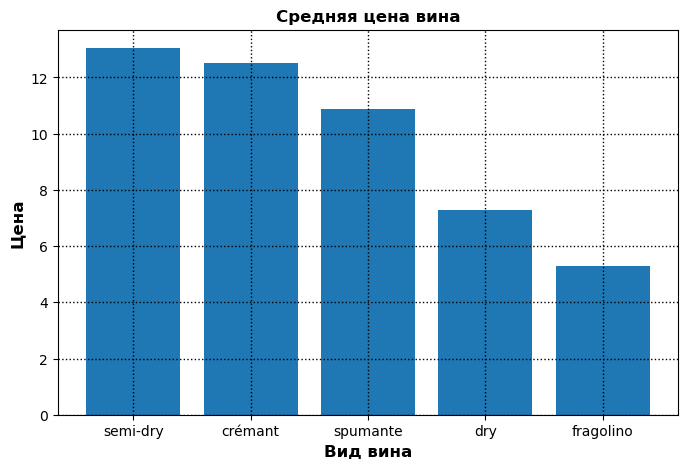

In [39]:
plt.figure(figsize=(8,5))
x = wine_mean.kind
y = wine_mean.price_eur
plt.bar(x,y)
plt.title('Средняя цена вина', fontweight="bold", fontsize=12)
plt.xlabel('Вид вина', fontweight="bold", fontsize=12)
plt.ylabel('Цена', fontweight="bold", fontsize=12)
plt.grid(color='black', linestyle=':', linewidth=1)

In [40]:
# средняя цена

df.price_eur.mean()

8.300624999999943

In [41]:
# максимальная цена

df.price_eur.max()

19.9

In [42]:
# минимальня цена

df.price_eur.min()

4.64

In [43]:
# дисперсия

df.price_eur.var()

14.309172606242024

In [45]:
# Стандартное отклонение
df.price_eur.std()

3.7827467013060794

(array([2824., 4942.,    0.,  706., 1412.,  706.,    0.,    0.,    0.,
         706.]),
 array([ 4.64 ,  6.166,  7.692,  9.218, 10.744, 12.27 , 13.796, 15.322,
        16.848, 18.374, 19.9  ]),
 <BarContainer object of 10 artists>)

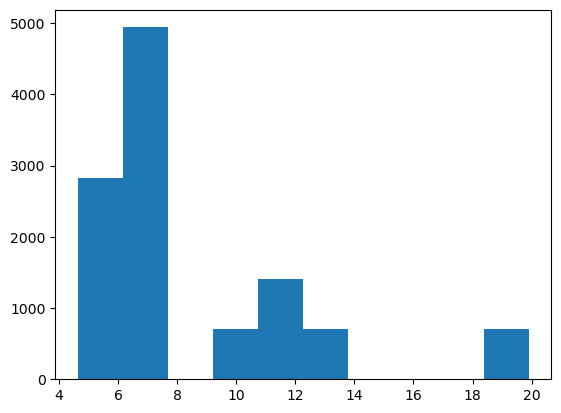

In [48]:
# гистограмма плотности распределения

plt.hist(df.price_eur, bins=10)

In [49]:
# сортировка вина "dry" через lambda функцию

dry_w = df.kind.apply(lambda type: type == 'dry')

In [50]:
dry_w.head()

0    False
1     True
2     True
3    False
4     True
Name: kind, dtype: bool

In [54]:
dry_w_title = df[dry_w]

In [55]:
dry_w_title.head()

,title,type,kind,country,region,price_eur,volume_lit,order_number
1,Grauer Burgunder eins zu eins Kabinett trocke...,white wine,dry,Germany,Palatinate,7.49,0.75,70126-DE-WW-PG-002-12
2,Fabelhaft Tinto Douro DOC Rotwein 2020 - Niep...,red wine,dry,Portugal,Douro & Porto (PT),10.48,0.75,70009-PT-RW-BL-009-12
4,Mandus Primitivo di Manduria DOC 2019 - Pietr...,red wine,dry,Italy,Apulia (IT),10.76,0.75,70015-IT-RW-PR-005-11
6,Horgelus Blanc Côtes de Gascogne 2021 - Domai...,white wine,dry,France,Gascogne (FR),6.53,0.75,70217-FR-WW-BL-001-11
7,Pleno Tempranillo Navarra DO 2020 - Bodegas A...,red wine,dry,Spain,Aragonien (ES),4.65,0.75,70009-ES-RW-TE-0002-12


In [58]:
dry_w_title.shape

(7060, 8)